In [1]:
# Import data from Excel sheet
import pandas as pd
df = pd.read_excel('aibl_ptdemog_final.xlsx', sheet_name='aibl_ptdemog_final')
#print(df)
sid = df['RID']
grp = df['DXCURREN']
age = df['age']
sex = df['PTGENDER(1=Male)']
tiv = df['Total'] # TIV
field = df['field_strength']
grpbin = (grp > 1) # 1=CN, ...
amy_bin = df['conversion_CL_threshold_26']

In [2]:
# Scan for nifti file names
import glob
dataAIBL = sorted(glob.glob('mwp1_MNI_AIBL/*.nii.gz'))
dataFiles = dataAIBL
numfiles = len(dataFiles)
print('Found ', str(numfiles), ' nifti files')

Found  606  nifti files


In [3]:
# Match covariate information
import re
debug = False
cov_idx = [-1] * numfiles # list; array: np.full((numfiles, 1), -1, dtype=int)
print('Matching covariates for loaded files ...')
for i,id in enumerate(sid):
  p = [j for j,x in enumerate(dataFiles) if re.search('_%d_MR_' % id, x)] # extract ID numbers from filename, translate to Excel row index
  if len(p)==0:
    if debug: print('Did not find %04d' % id) # did not find Excel sheet subject ID in loaded file selection
  else:
    if debug: print('Found %04d in %s: %s' % (id, p[0], dataFiles[p[0]]))
    cov_idx[p[0]] = i # store Excel index i for data file index p[0]
print('Checking for scans not found in Excel sheet: ', sum(x<0 for x in cov_idx))

labels = pd.DataFrame({'Group':grpbin}).iloc[cov_idx, :]
grps = pd.DataFrame({'Group':grp, 'RID':sid}).iloc[cov_idx, :]
amy_status = pd.DataFrame({'amy_pos':amy_bin}).iloc[cov_idx, :]

Matching covariates for loaded files ...
Checking for scans not found in Excel sheet:  0


In [4]:
# Load original data from disk
import h5py
import numpy as np
from pandas import DataFrame
from keras.utils import to_categorical
hf = h5py.File('orig_images_wb_mwp1_MNI_AIBL.hdf5', 'r')
hf.keys # read keys
#labels = np.array(hf.get('labels')) # note: was of data frame type before
images = np.array(hf.get('images'))
hf.close()
#labels = to_categorical(np.asarray(labels)) # use grps to access original labels
print(images.shape)

Using TensorFlow backend.


(606, 100, 100, 120, 1)


In [5]:
# filter scans by amyloid status
labels = to_categorical(np.asarray(labels)) # use grps to access original labels
amy_filter = np.equal(np.transpose(amy_status.to_numpy()), labels[:,1])

# drop participants/entries by amy_filter
#dataFiles = [i for (i, v) in zip(dataFiles, np.squeeze(amy_filter)) if v] # filter list of files
#cov_idx = [i for (i, v) in zip(cov_idx, np.squeeze(amy_filter)) if v] # filter list of excel row indices
#labels = labels[np.squeeze(amy_filter), :]
#grps = grps.iloc[np.squeeze(amy_filter)]
#numfiles = len(dataFiles)
#print('Kept ', str(numfiles), ' nifti files')

In [6]:
# specify version of tensorflow
#%tensorflow_version 1.x
#%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
# disable tensorflow deprecation warnings
import logging
logging.getLogger('tensorflow').disabled=True
# downgrade to specific version
#!pip install tensorflow-gpu==1.15
#import tensorflow as tf
#print(tf.__version__)
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto(
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
    # device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = False #True
session = tf.Session(config=config)
set_session(session)

1.15.0


validating model newmodel_rawdata_pretrained/newmodel_wb_cv1.hdf5
Test accuracy: 65.96 %


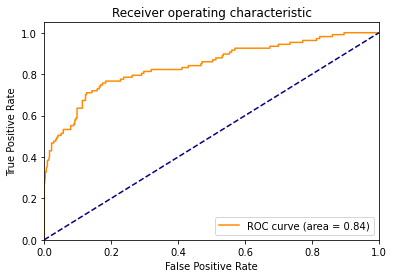

Optimal prediction threshold: 0.96703
Optimal prediction threshold: 0.99054
AUC for MCI vs. CN = 0.78
AUC for AD vs. CN = 0.90
AUC for MCI vs. CN = 0.783
AUC for AD vs. CN = 0.902
Acc for MCI vs. CN = 62.2
Acc for AD vs. CN = 65.0
confusion matrix (naive)
[[191 125]
 [ 15  39]
 [  4  49]]
oAcc for MCI vs. CN = 79.7
oAcc for AD vs. CN = 85.1
confusion matrix (optimized)
[[258  58]
 [ 17  37]
 [  9  44]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv2.hdf5
Test accuracy: 85.58 %


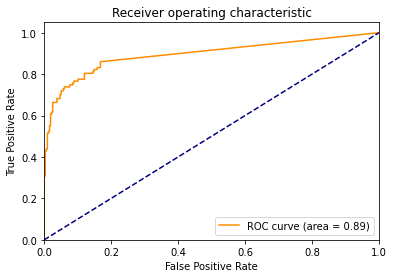

Optimal prediction threshold: 0.32385
Optimal prediction threshold: 0.79105
AUC for MCI vs. CN = 0.82
AUC for AD vs. CN = 0.97
AUC for MCI vs. CN = 0.824
AUC for AD vs. CN = 0.967
Acc for MCI vs. CN = 84.9
Acc for AD vs. CN = 88.3
confusion matrix (naive)
[[278  38]
 [ 18  36]
 [  5  48]]
oAcc for MCI vs. CN = 81.6
oAcc for AD vs. CN = 93.5
confusion matrix (optimized)
[[263  53]
 [ 15  39]
 [  1  52]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv3.hdf5
Test accuracy: 66.43 %


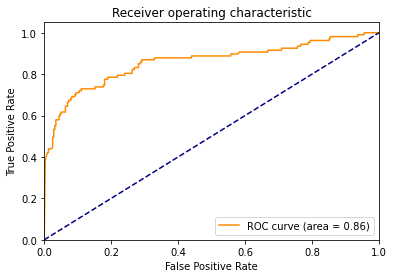

Optimal prediction threshold: 0.97795
Optimal prediction threshold: 0.99931
AUC for MCI vs. CN = 0.78
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.781
AUC for AD vs. CN = 0.938
Acc for MCI vs. CN = 62.2
Acc for AD vs. CN = 64.5
confusion matrix (naive)
[[187 129]
 [ 11  43]
 [  2  51]]
oAcc for MCI vs. CN = 79.2
oAcc for AD vs. CN = 90.5
confusion matrix (optimized)
[[256  60]
 [ 17  37]
 [  7  46]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv4.hdf5
Test accuracy: 68.32 %


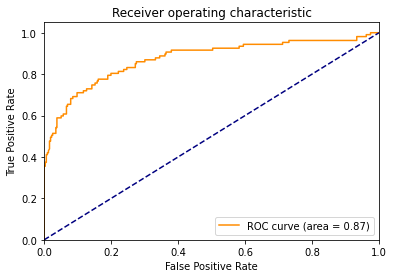

Optimal prediction threshold: 0.96081
Optimal prediction threshold: 0.97224
AUC for MCI vs. CN = 0.79
AUC for AD vs. CN = 0.96
AUC for MCI vs. CN = 0.793
AUC for AD vs. CN = 0.955
Acc for MCI vs. CN = 63.8
Acc for AD vs. CN = 66.1
confusion matrix (naive)
[[191 125]
 [  9  45]
 [  0  53]]
oAcc for MCI vs. CN = 80.8
oAcc for AD vs. CN = 86.2
confusion matrix (optimized)
[[265  51]
 [ 20  34]
 [  5  48]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv5.hdf5
Test accuracy: 65.48 %


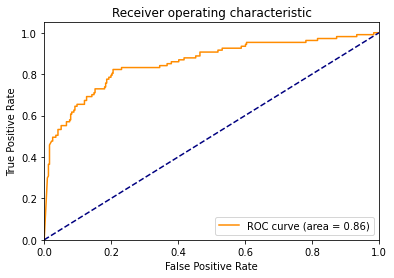

Optimal prediction threshold: 0.98689
Optimal prediction threshold: 0.98678
AUC for MCI vs. CN = 0.78
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.784
AUC for AD vs. CN = 0.929
Acc for MCI vs. CN = 61.1
Acc for AD vs. CN = 63.4
confusion matrix (naive)
[[183 133]
 [ 11  43]
 [  2  51]]
oAcc for MCI vs. CN = 77.8
oAcc for AD vs. CN = 81.3
confusion matrix (optimized)
[[251  65]
 [ 17  37]
 [  4  49]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv6.hdf5
Test accuracy: 68.09 %


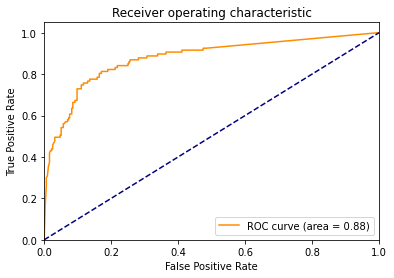

Optimal prediction threshold: 0.99726
Optimal prediction threshold: 0.99399
AUC for MCI vs. CN = 0.81
AUC for AD vs. CN = 0.95
AUC for MCI vs. CN = 0.805
AUC for AD vs. CN = 0.951
Acc for MCI vs. CN = 63.5
Acc for AD vs. CN = 66.1
confusion matrix (naive)
[[191 125]
 [ 10  44]
 [  0  53]]
oAcc for MCI vs. CN = 83.2
oAcc for AD vs. CN = 84.8
confusion matrix (optimized)
[[273  43]
 [ 19  35]
 [  6  47]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv7.hdf5
Test accuracy: 60.05 %


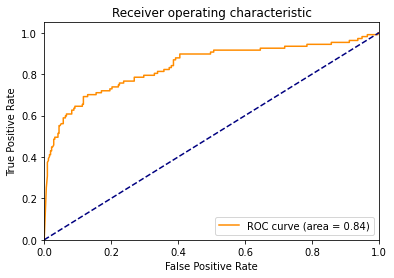

Optimal prediction threshold: 0.99918
Optimal prediction threshold: 0.99935
AUC for MCI vs. CN = 0.75
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.754
AUC for AD vs. CN = 0.925
Acc for MCI vs. CN = 54.3
Acc for AD vs. CN = 56.6
confusion matrix (naive)
[[156 160]
 [  9  45]
 [  0  53]]
oAcc for MCI vs. CN = 82.7
oAcc for AD vs. CN = 87.0
confusion matrix (optimized)
[[275  41]
 [ 23  31]
 [ 10  43]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv8.hdf5
Test accuracy: 60.52 %


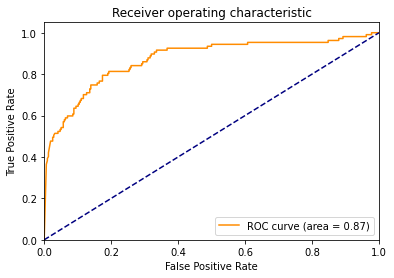

Optimal prediction threshold: 0.95826
Optimal prediction threshold: 0.99653
AUC for MCI vs. CN = 0.80
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.803
AUC for AD vs. CN = 0.942
Acc for MCI vs. CN = 55.1
Acc for AD vs. CN = 56.1
confusion matrix (naive)
[[155 161]
 [  5  49]
 [  1  52]]
oAcc for MCI vs. CN = 69.5
oAcc for AD vs. CN = 82.4
confusion matrix (optimized)
[[212 104]
 [  9  45]
 [  2  51]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv9.hdf5
Test accuracy: 55.32 %


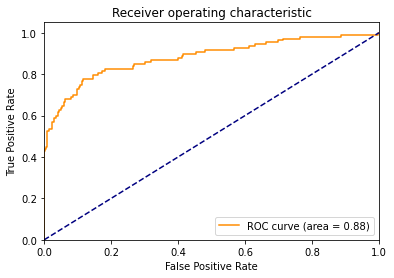

Optimal prediction threshold: 0.96039
Optimal prediction threshold: 0.98228
AUC for MCI vs. CN = 0.82
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.824
AUC for AD vs. CN = 0.940
Acc for MCI vs. CN = 49.5
Acc for AD vs. CN = 50.4
confusion matrix (naive)
[[135 181]
 [  6  48]
 [  2  51]]
oAcc for MCI vs. CN = 80.3
oAcc for AD vs. CN = 88.6
confusion matrix (optimized)
[[259  57]
 [ 16  38]
 [  4  49]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv10.hdf5
Test accuracy: 60.76 %


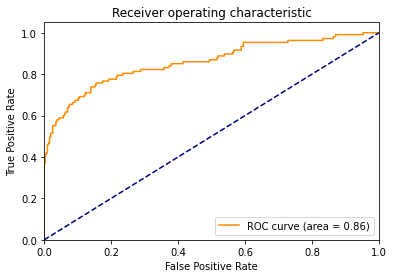

Optimal prediction threshold: 0.99323
Optimal prediction threshold: 0.98215
AUC for MCI vs. CN = 0.80
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.796
AUC for AD vs. CN = 0.922
Acc for MCI vs. CN = 56.2
Acc for AD vs. CN = 58.0
confusion matrix (naive)
[[165 151]
 [ 11  43]
 [  4  49]]
oAcc for MCI vs. CN = 85.1
oAcc for AD vs. CN = 84.6
confusion matrix (optimized)
[[283  33]
 [ 22  32]
 [ 12  41]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv11.hdf5
Test accuracy: 64.54 %


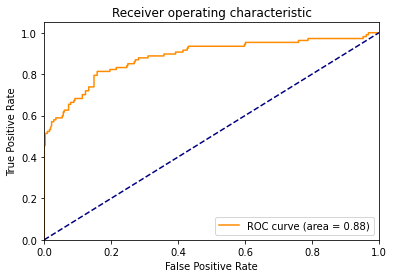

Optimal prediction threshold: 0.98846
Optimal prediction threshold: 0.98794
AUC for MCI vs. CN = 0.82
AUC for AD vs. CN = 0.95
AUC for MCI vs. CN = 0.820
AUC for AD vs. CN = 0.947
Acc for MCI vs. CN = 59.7
Acc for AD vs. CN = 61.0
confusion matrix (naive)
[[173 143]
 [  6  48]
 [  1  52]]
oAcc for MCI vs. CN = 82.2
oAcc for AD vs. CN = 84.8
confusion matrix (optimized)
[[266  50]
 [ 16  38]
 [  6  47]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv12.hdf5
Test accuracy: 66.43 %


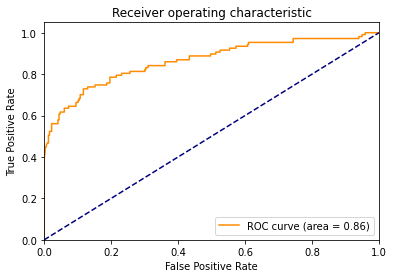

Optimal prediction threshold: 0.99806
Optimal prediction threshold: 0.99997
AUC for MCI vs. CN = 0.80
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.799
AUC for AD vs. CN = 0.931
Acc for MCI vs. CN = 62.4
Acc for AD vs. CN = 64.5
confusion matrix (naive)
[[188 128]
 [ 11  43]
 [  3  50]]
oAcc for MCI vs. CN = 84.3
oAcc for AD vs. CN = 92.7
confusion matrix (optimized)
[[279  37]
 [ 21  33]
 [  9  44]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv13.hdf5
Test accuracy: 61.94 %


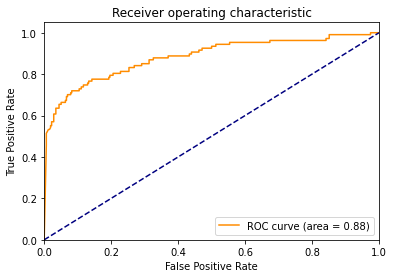

Optimal prediction threshold: 0.99790
Optimal prediction threshold: 0.99882
AUC for MCI vs. CN = 0.82
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.823
AUC for AD vs. CN = 0.943
Acc for MCI vs. CN = 56.5
Acc for AD vs. CN = 58.5
confusion matrix (naive)
[[163 153]
 [  8  46]
 [  0  53]]
oAcc for MCI vs. CN = 83.0
oAcc for AD vs. CN = 87.8
confusion matrix (optimized)
[[271  45]
 [ 18  36]
 [  7  46]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv14.hdf5
Test accuracy: 67.61 %


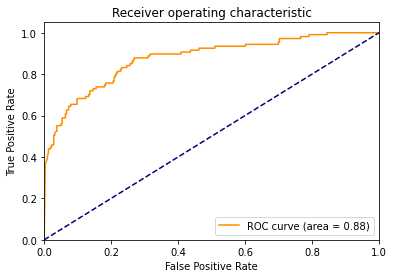

Optimal prediction threshold: 0.91910
Optimal prediction threshold: 0.99988
AUC for MCI vs. CN = 0.82
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.823
AUC for AD vs. CN = 0.930
Acc for MCI vs. CN = 63.8
Acc for AD vs. CN = 65.0
confusion matrix (naive)
[[190 126]
 [  8  46]
 [  3  50]]
oAcc for MCI vs. CN = 74.3
oAcc for AD vs. CN = 90.5
confusion matrix (optimized)
[[231  85]
 [ 10  44]
 [  4  49]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv15.hdf5
Test accuracy: 52.96 %


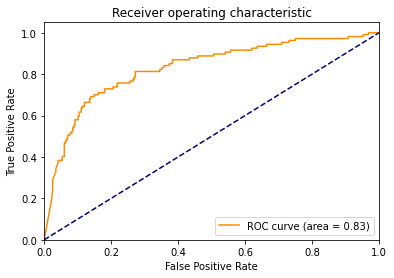

Optimal prediction threshold: 0.99898
Optimal prediction threshold: 0.99961
AUC for MCI vs. CN = 0.75
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.750
AUC for AD vs. CN = 0.910
Acc for MCI vs. CN = 46.5
Acc for AD vs. CN = 48.2
confusion matrix (naive)
[[126 190]
 [  8  46]
 [  1  52]]
oAcc for MCI vs. CN = 78.6
oAcc for AD vs. CN = 85.6
confusion matrix (optimized)
[[259  57]
 [ 22  32]
 [  8  45]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv16.hdf5
Test accuracy: 48.70 %


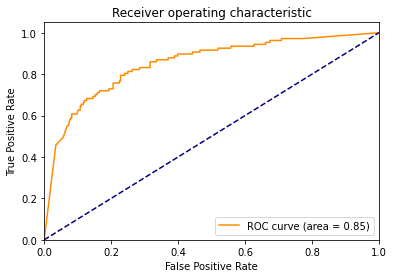

Optimal prediction threshold: 0.99928
Optimal prediction threshold: 0.99997
AUC for MCI vs. CN = 0.79
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.788
AUC for AD vs. CN = 0.916
Acc for MCI vs. CN = 41.4
Acc for AD vs. CN = 42.3
confusion matrix (naive)
[[103 213]
 [  4  50]
 [  0  53]]
oAcc for MCI vs. CN = 74.9
oAcc for AD vs. CN = 86.4
confusion matrix (optimized)
[[240  76]
 [ 17  37]
 [  5  48]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv17.hdf5
Test accuracy: 82.03 %


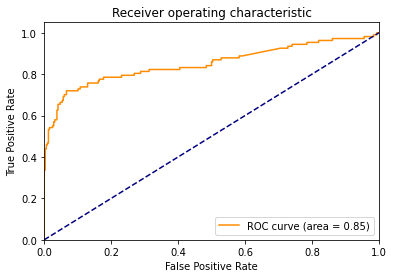

Optimal prediction threshold: 0.74325
Optimal prediction threshold: 0.75714
AUC for MCI vs. CN = 0.76
AUC for AD vs. CN = 0.95
AUC for MCI vs. CN = 0.756
AUC for AD vs. CN = 0.947
Acc for MCI vs. CN = 80.5
Acc for AD vs. CN = 85.4
confusion matrix (naive)
[[266  50]
 [ 22  32]
 [  4  49]]
oAcc for MCI vs. CN = 87.8
oAcc for AD vs. CN = 92.7
confusion matrix (optimized)
[[295  21]
 [ 24  30]
 [  7  46]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv18.hdf5
Test accuracy: 64.07 %


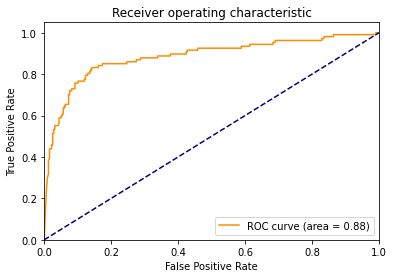

Optimal prediction threshold: 0.95851
Optimal prediction threshold: 0.98316
AUC for MCI vs. CN = 0.82
AUC for AD vs. CN = 0.95
AUC for MCI vs. CN = 0.819
AUC for AD vs. CN = 0.951
Acc for MCI vs. CN = 59.5
Acc for AD vs. CN = 60.7
confusion matrix (naive)
[[173 143]
 [  7  47]
 [  2  51]]
oAcc for MCI vs. CN = 81.1
oAcc for AD vs. CN = 87.5
confusion matrix (optimized)
[[261  55]
 [ 15  39]
 [  2  51]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv19.hdf5
Test accuracy: 75.89 %


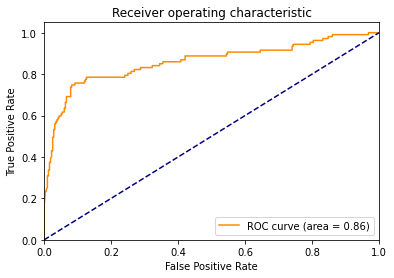

Optimal prediction threshold: 0.91312
Optimal prediction threshold: 0.97054
AUC for MCI vs. CN = 0.76
AUC for AD vs. CN = 0.96
AUC for MCI vs. CN = 0.759
AUC for AD vs. CN = 0.961
Acc for MCI vs. CN = 72.7
Acc for AD vs. CN = 77.5
confusion matrix (naive)
[[234  82]
 [ 19  35]
 [  1  52]]
oAcc for MCI vs. CN = 83.8
oAcc for AD vs. CN = 91.9
confusion matrix (optimized)
[[277  39]
 [ 21  33]
 [  4  49]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv20.hdf5
Test accuracy: 74.94 %


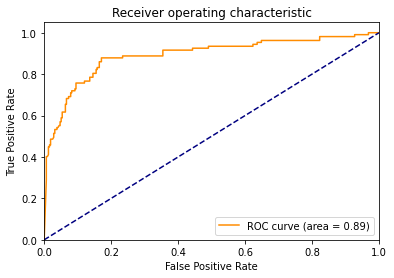

Optimal prediction threshold: 0.97460
Optimal prediction threshold: 0.96724
AUC for MCI vs. CN = 0.82
AUC for AD vs. CN = 0.96
AUC for MCI vs. CN = 0.821
AUC for AD vs. CN = 0.961
Acc for MCI vs. CN = 71.4
Acc for AD vs. CN = 74.5
confusion matrix (naive)
[[222  94]
 [ 12  42]
 [  0  53]]
oAcc for MCI vs. CN = 81.6
oAcc for AD vs. CN = 85.1
confusion matrix (optimized)
[[262  54]
 [ 14  40]
 [  1  52]]


In [7]:
# Split data into training/validation and holdout test data
from sklearn.model_selection import StratifiedKFold,train_test_split
import numpy as np
import gc
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" # model will be trained on GPU 0

import keras
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras import models
from keras.optimizers import Adam
from keras import initializers
from keras.callbacks import EarlyStopping
import tensorflow as tf
from statistics import mean,stdev
from sklearn.metrics import confusion_matrix

acc_test, auc_test, auc_AD, auc_MCI = [], [], [], []
acc_AD, acc_MCI, opt_acc_AD, opt_acc_MCI = [], [], [], []
grps['pred'] = np.nan #-1

num_kfold = 20 # number of cross-validation loops equal to number of models
batch_size = 8

for k in range(num_kfold):
    gc.collect()
    print('validating model newmodel_rawdata_pretrained/newmodel_wb_cv%d.hdf5' % (k+1))
    mymodel = models.load_model('newmodel_rawdata_pretrained/newmodel_wb_cv%d.hdf5' % (k+1))
    
    # Calculate accuracy for validation data
    #scores = mymodel.evaluate(images, labels, batch_size=batch_size) #, verbose=0
    #print("Test %s: %.2f%%" % (mymodel.metrics_names[1], scores[1]*100))
    #acc_test.append(scores[1]*100)
    test_idX = np.array(range(amy_filter.shape[1]))[np.squeeze(amy_filter)] # filter index vector by amy status
    testgrps = grps.iloc[test_idX, :]
    testdat = images[test_idX, :]
    test_Y = labels[test_idX, :]
    
    # calculate area under the curve
    # AUC as optimization function during training: https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
    pred = mymodel.predict(testdat, batch_size=batch_size)
    grps.iloc[test_idX, 2] = pred[:, 1]
    acc_all = np.mean((test_Y[:, 1] == np.round(pred[:, 1])).astype(int))*100
    print("Test accuracy: %.2f %%" % acc_all)
    acc_test.append(acc_all)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    acc = dict()
    opt_acc = dict()
    thresh = dict()
    for i in range(2): # classes dummy vector: 0 - CN, 1 - MCI/AD
        fpr[i], tpr[i], _ = roc_curve(test_Y[:, i], pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr[1], tpr[1], color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    auc_test.append(roc_auc[1])
    
    # redo AUC for binary comparison: AD vs. HC and MCI vs. HC
    for i in [2,3]:
      grpi = np.equal(testgrps.Group.to_numpy(dtype=np.int), np.ones((testgrps.shape[0],), dtype=np.int)*i)
      grp1 = np.equal(testgrps.Group.to_numpy(dtype=np.int), np.ones((testgrps.shape[0],), dtype=np.int))
      grpidx = np.logical_or(grpi, grp1)
      fpr[i], tpr[i], thresholds = roc_curve(test_Y[grpidx, 1], pred[grpidx, 1])
      roc_auc[i] = auc(fpr[i], tpr[i])
      thresh[i] = thresholds[np.argmax(tpr[i] - fpr[i])]
      print('Optimal prediction threshold: %0.5f' % thresh[i])
      acc[i] = np.mean((test_Y[grpidx, 1] == np.round(pred[grpidx, 1])).astype(int))*100
      opt_acc[i] = np.mean((test_Y[grpidx, 1] == (pred[grpidx, 1]>thresh[i]).astype(int)).astype(int))*100

    print('AUC for MCI vs. CN = %0.2f' % roc_auc[2])
    print('AUC for AD vs. CN = %0.2f' % roc_auc[3])
    auc_AD.append(roc_auc[3])
    auc_MCI.append(roc_auc[2])
    acc_AD.append(acc[3])
    acc_MCI.append(acc[2])
    opt_acc_AD.append(opt_acc[3])
    opt_acc_MCI.append(opt_acc[2])
    
    print('AUC for MCI vs. CN = %0.3f' % roc_auc[2])
    print('AUC for AD vs. CN = %0.3f' % roc_auc[3])
    print('Acc for MCI vs. CN = %0.1f' % acc[2])
    print('Acc for AD vs. CN = %0.1f' % acc[3])
    print('confusion matrix (naive)')
    confmat = confusion_matrix(testgrps.Group-1, np.round(pred[:, 1]))
    print(confmat[:,(0,1)])
    print('oAcc for MCI vs. CN = %0.1f' % opt_acc[2])
    print('oAcc for AD vs. CN = %0.1f' % opt_acc[3])
    print('confusion matrix (optimized)')
    confmat = confusion_matrix(testgrps.Group-1, (pred[:, 1]>thresh[2]).astype(int)) ## use MCI threshold
    print(confmat[:,(0,1)])

In [8]:
# print model performance summary
from statistics import mean,stdev
print('Acc for all test data = %0.1f +/- %0.1f' % (mean(acc_test), stdev(acc_test)))
print('AUC for all test data = %0.3f +/- %0.3f' % (mean(auc_test), stdev(auc_test)))
print('AUC for MCI vs. CN = %0.3f +/- %0.3f' % (mean(auc_MCI), stdev(auc_MCI)))
print('AUC for AD vs. CN = %0.3f +/- %0.3f' % (mean(auc_AD), stdev(auc_AD)))
print('Mean Acc for MCI vs. CN = %0.1f +/- %0.1f' % (mean(acc_MCI), stdev(acc_MCI)))
print('Mean Acc for AD vs. CN = %0.1f +/- %0.1f' % (mean(acc_AD), stdev(acc_AD)))
print('Mean oAcc for MCI vs. CN = %0.1f +/- %0.1f' % (mean(opt_acc_MCI), stdev(opt_acc_MCI)))
print('Mean oAcc for AD vs. CN = %0.1f +/- %0.1f' % (mean(opt_acc_AD), stdev(opt_acc_AD)))

Acc for all test data = 65.8 +/- 9.0
AUC for all test data = 0.866 +/- 0.018
AUC for MCI vs. CN = 0.795 +/- 0.026
AUC for AD vs. CN = 0.938 +/- 0.018
Mean Acc for MCI vs. CN = 61.4 +/- 10.5
Mean Acc for AD vs. CN = 63.6 +/- 11.4
Mean oAcc for MCI vs. CN = 80.6 +/- 4.2
Mean oAcc for AD vs. CN = 87.5 +/- 3.5


In [9]:
results = pd.DataFrame({'Accuracy_Test':acc_test, 'AUC_Test':auc_test, 'AUC_MCI':auc_MCI, 'AUC_AD':auc_AD,
                        'Acc_MCI':acc_MCI, 'Acc_AD':acc_AD,
                        'Opt_acc_MCI':opt_acc_MCI, 'Opt_acc_AD':opt_acc_AD})
print(results)

    Accuracy_Test  AUC_Test   AUC_MCI    AUC_AD    Acc_MCI     Acc_AD  \
0       65.957447  0.841580  0.782642  0.901630  62.162162  65.040650   
1       85.579196  0.894756  0.823781  0.967071  84.864865  88.346883   
2       66.430260  0.858497  0.780708  0.937754  62.162162  64.498645   
3       68.321513  0.873018  0.792546  0.955010  63.783784  66.124661   
4       65.484634  0.855894  0.784488  0.928648  61.081081  63.414634   
5       68.085106  0.877292  0.805057  0.950890  63.513514  66.124661   
6       60.047281  0.838341  0.753604  0.924678  54.324324  56.639566   
7       60.520095  0.871998  0.802977  0.942321  55.135135  56.097561   
8       55.319149  0.881433  0.824250  0.939694  49.459459  50.406504   
9       60.756501  0.858379  0.796326  0.921603  56.216216  57.994580   
10      64.539007  0.882793  0.819796  0.946979  59.729730  60.975610   
11      66.430260  0.864589  0.799226  0.931186  62.432432  64.498645   
12      61.938534  0.882305  0.822521  0.943217  56